# Ipython notebook

Ipython est initialement un projet de console python spécialisé pour les applications scientifiques.
Avec le temps, le projet s'est élargi et inclus désormais un ensemble d'utilitaires pour les applications scientifiques, dont le notebook.

Ipython notebook est une feuille de calul interactive, inspirée de Maple et de Mathematica, qui fonctionne en mode web service. Au démarrage d'un notebook, Ipython lance un serveur d'application dans lequel tourne un kernel (noyau d'application) Ipython et le navigateur par défaut de votre OS sur l'adresse localhost 127.0.0.1. 

Ce mode de fonctionnement client/serveur permet notamment de lancer des calculs en se connectant à un supercalculateur ou encore à un data center de type Amazon Web Service, Microsoft Azure ou Google App Engine.


Le notebook est un environnement de calcul interactif complémentaire avec Spyder.
En tant qu'IDE, Spyder est plus adapté au développement de fonctions et d'applications.
Le notebook est plus adapté à la réalisation d'étude ou au traitement de donnée.

## Fonctionnement de l'Ipython Notebook

Dans les versions >2.x de Ipython, le notebook s'utilise en basculant constemment entre 2 modes : 

* mode commande des cellules: 
    * Accessible en appuyant sur ESC
    * Permet de créer (A et B), supprimer (X), copier (C) et coller (V) des cellules
    * Changer de type de cellule : code (Y) ou markdown (M)

* mode édition
    * Accessible en appuyant sur ENTER
    * Executer le code de la cellule (SHIFT ENTER) ou afficher le rendu d'une cellule mardown

L'ensemble des commandes est accessible dans la barre d'outil (edit). L'ensemble des raccourcis est disponible dans le menu help de l'interface (help -> keyboard shortcut), ainsi qu'une visite guidée de l'interface (help -> user interface tour)

Pour plus d'éléments, se rérérer à la documentation officielle : 

http://ipython.org/ipython-doc/2/notebook/notebook.html#structure-of-a-notebook-document

Une galerie de notebook est disponible en ligne via l'application web nbviewer qui permet la visualisation de fichiers .ipynb hébergés sur Github : 
http://nbviewer.ipython.org/

# Numpy, Scipy et Matplotlib

Numpy, Scipy et Matplotlib sont les bibliothèques de calcul numérique les plus importantes de Python.

## Numpy 

Inclus : 

* l'ensemble des fonctions mathématiques
* les manipulations sur les vecteurs et les matrices
http://wiki.scipy.org/NumPy_for_Matlab_Users

Il comprend approximativement l'ensemble des fonctionalités de base de Matlab 

In [1]:
import numpy as np # np est une convention d'import
print np.array([0,1,2])

[0 1 2]


Le numpy array est l'équivalent du vecteur matlab : 

In [2]:
x = np.arange(0,10)
print x

[0 1 2 3 4 5 6 7 8 9]


In [3]:
print x**2 # mise à la puissance 2. Toute les opérations sont par défaut élément par élément (elemnt wise)
print x+x
print x.dot(x) # produit scalaire

[ 0  1  4  9 16 25 36 49 64 81]
[ 0  2  4  6  8 10 12 14 16 18]
285


In [4]:
x2 = np.array([[0,1],[1,0]]) # matrice
print x2 

[[0 1]
 [1 0]]


In [5]:
x3 = np.random.randint(low=0,high=10,size=[3,3])
u3 = np.array([2,3,4])
print x3
print x3.T # transposée
print x3*u3# multiplication de chaque ligne par le vecteur u3
print x3.dot(u3) # produit matricielle

[[1 6 5]
 [7 3 8]
 [8 7 2]]
[[1 7 8]
 [6 3 7]
 [5 8 2]]
[[ 2 18 20]
 [14  9 32]
 [16 21  8]]
[40 55 45]


De manière générale, les manipulations purement matricielles sont souvent plus lourdes en termes de syntaxe que Matlab&reg;  (MATrix LABoratory) qui est spécialisé sur ce type d'objet. Cependant, les performances sont similaires. 

Un benchmark sur ce type de manipulation réalisé par la NASA entre Matlab, Python, Java et Fortran est disponible en ligne : https://modelingguru.nasa.gov/docs/DOC-1762 .

En substance matlab et numpy ont des performances similaires, Fortran (avec compilateur intel) est toujours meilleur.


## Matplotlib 

La bibliothèque graphique la plus populaire pour les graphes 2D (Mayavi pour la 3D).
La galerie en ligne est munie de nombreux exemple de codes : 

http://matplotlib.org/gallery.html

Un tutorial de matplotlib : http://nbviewer.ipython.org/github/cmiller8/PythonforBuildingAnalysts/blob/master/0_PythonBaseLibraries/3_MatplotlibLibrary.ipynb

In [6]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

La ligne précédente est une commande spécifique à Ipython. Elle ne fait pas partie du langage Python.
Les commandes commançant par **%** ou **%%** sont des **magic** qui configurent le comportement du notebook.
**%matplotlib inline**  indique que les graphes seront inclus en ligne dans le notebook (et sauvegardés avec lui).
Les graphes interactifs s'obtiennent avec la commande **%matplotlib qt **

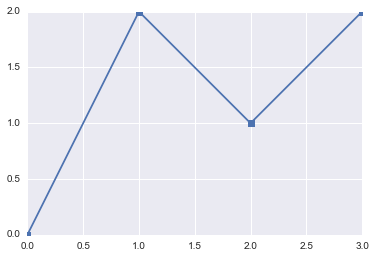

In [7]:
plt.plot([0,1,2,3],[0,2,1,2],'s-')

Création de 100 points de 0 à $2\pi$ dans le vecteur $x_4$, puis calcul de 
$$y_4 = \sin(x4)$$

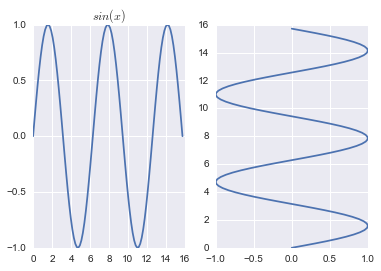

In [8]:
x4 = np.linspace(0,5*np.pi,100) 
y4 = np.sin(x4)

fig = plt.figure() # création d'une fenetre de graph
ax1 = fig.add_subplot(121) # graphe de gauche sur 2 graphes répartis horizontalement
ax2 = fig.add_subplot(122) # graphe de droite sur 2 graphes répartis horizontalement 
ax1.plot(x4,y4)
ax2.plot(y4,x4)
ax1.set_title(r'$sin(x)$')
fig.savefig('test.png',dpi=150)

Le code suivant génère un échantillon de taille 1000 tiré dans la loi normal multivariée : 

$$x_5 \sim  \mathcal{N}(\mu,\Sigma)$$
Avec $$\mu= \left(\begin{array}{cccc} 20 \\ 30 \\ 100\end{array} \right) $$

$$\Sigma= \left(\begin{array}{cccc} \\10&-5&0.3\\-5&10&0.2\\0.3&0.2&1000\end{array} \right)$$

Puis on trace uniquement les 2 premières composantes du vecteur dans un graphe de dispersion (*scatter*). On utilise la dernière composante pour la taille et la couleur des points.

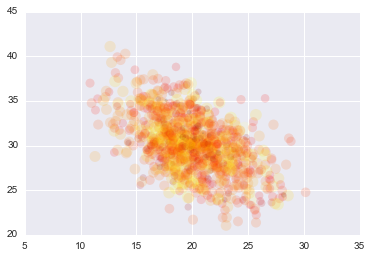

In [9]:
x5 = np.random.multivariate_normal(mean=[20,30,100],cov=[[10,-5,0.3],[-5,10,0.2],[0.3,0.2,1000]],size=1000)
plt.scatter(x5[:,0],x5[:,1],s=x5[:,2],c=x5[:,2],edgecolor='none',alpha=0.15,cmap='hot')

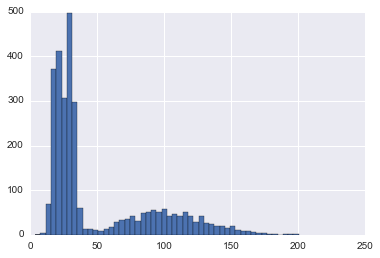

In [10]:
res = plt.hist(x5.flatten(),bins=50)  # que fait la méthode flatten ? 

## Scipy 

Comprend l'équivalent des principales toolbox de Matlab.

In [11]:
from scipy import linalg, optimize, sparse # par exemple : algèbre linéaire, optimisation et traitement de matrice crzeuse
from copy import copy

# TP : manipulation matricielle

http://en.wikibooks.org/wiki/LaTeX/Mathematics

### Exercice :  
* En utilisant la fonction diag de numpy, écrire la fonction permettant de construire la matrice tridiagonale de taille $N_x$ suivante:

$$ A = \left( \begin{array}{cccc}
1+2Fo & -Fo & & 0\\
-Fo & 1+2Fo & \ddots & \\
\\
& \ddots & 1+2Fo & -Fo \\
0 & & -Fo & 1+2Fo \end{array} \right)$$

Où 

$$Fo = \frac{\alpha \Delta t}{\Delta x^2}$$

Et le vecteur :

$$b^{i-1} = \left(\begin{array}{cccc} \theta^{i-1}_1+Fo\theta^{i-1}_{0} \\ \vdots \\ \theta^{i-1}_k\\ \vdots \\ \theta^{i-1}_{N_x}+Fo\theta^{i-1}_{N_x+1} \end{array} \right) $$


* En utilisant la fonction solve du package scipy.linalg, trouvez $T^i$ tel que : 

$$ AT^i = b^{i-1} + \frac{\Delta t}{\rho C_p}S^{i-1}$$

Où $S$ est un terme source en $W.m^{-3}.$

** NB : Il s'agit de la résolution de l'équation de la chaleur en 1D en instationnaire sur un schema centré implicite.**

**$\theta^{i-1}_{0}$ et $\theta^{i-1}_{n+1}$ sont les conditions limites à gauche et à droites**

**Fo est le nombre de Fourier de maille. Sur ce schéma numérique implicite, la solution est inconditionnellement stable, mais la précision est dégradée pour Fo > 1.**

**Exercice : **

* Caluler l'évolution de la température pour $N_t$ itérations temporelles et $N_x$ mailles spatiales. 
* Stocker le résultat dans une matrice, soit en affectant les valeurs dans une matrice définie à l'avance, soit en concatenant les vecteurs avec la fonction np.hstack
* Utilisez la commande **%%timeit** pour vérifier la performance de votre code
 

**Définition des paramètres physiques du système**

In [12]:
alpha = 0.54e-6  # m2.s-1
rho   = 2.4e3    # kg.m-3
Cp    = 0.88e3   #J.kg-1.K-1 

dt = 10*60. # s
dx = 0.01 # 1 m

L = 0.5 # 2 m 
duration = 3*24*3600. # 3 jours

Nx = int(L/dx)
Nt = int(duration/dt)

Fo = alpha*dt/(dx**2) # Fourier de maille. Peremt d'apprecier la précision et la stabilité du schéma numérique

**Définition de la matrice $A$**

In [13]:
A = np.diag(-Fo*np.ones(Nx-1),-1)+\
    np.diag(1+2*Fo*np.ones(Nx))+\
    np.diag(-Fo*np.ones(Nx-1),1)

In [14]:
print A

[[ 7.48 -3.24  0.   ...,  0.    0.    0.  ]
 [-3.24  7.48 -3.24 ...,  0.    0.    0.  ]
 [ 0.   -3.24  7.48 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  7.48 -3.24  0.  ]
 [ 0.    0.    0.   ..., -3.24  7.48 -3.24]
 [ 0.    0.    0.   ...,  0.   -3.24  7.48]]


**Définition du vecteur $b$**

In [15]:
def rhs(Ti,Tg,Td,Fo):
    """
    rhs : right hand side of the equation
    
    Calcul le vecteur b tel que Ax = b 
    
    Ti vecteur de solution à l'instant i
    Tg condition limite à gauche en température (scalaire)
    Td condition limite à droite en température (scalaire)
    Fo : Fourier de maille
    """
    b = copy(Ti)
    b[0]  += Fo*Tg 
    b[-1] += Fo*Td 
    return b    

**Résolution du système pour $N_t$ pas de temps**

In [16]:
#%%timeit
Ti = 15*np.ones([Nx,1])          # Condition initiale à 15°C
t = np.linspace(0,duration,Nt)   # vecteur temps
Tg = 10 + 2*np.sin(t/(24*3600)*2*np.pi)  # Condition limité à gauche sinusoidale centré autour de 10°C
TT = []                         # liste vide dans laquelle on va ajouter les profiles de température à chaque pas de temps
TT.append([Ti])

for t in range(Nt):   
    b = rhs(Ti,Tg[t],19,Fo)
    Ti = np.linalg.solve(A,b)    # Résolution d'un système d'équation linéaire AX=b
    TT.append([Ti])

T =  np.vstack(TT)
T = np.reshape(T,[Nt+1,Nx])

### Exercice : 

* Tracez de manière superposée le profil de température $\theta$ pour les 10 premiers pas de temps.

* Représentez les courbes d'isotempératures annotée en noire sur le champs de température représenté par la colormap "hot"

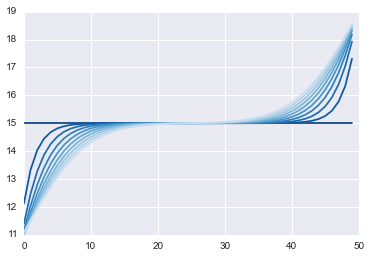

In [17]:
with sns.color_palette("Blues_r",12): # définition du cycle des couleurs des courbes
    ax = plt.plot(T[0:10,:].T)

In [18]:
X,Y  = np.meshgrid(np.arange(Nx),np.arange(Nt+1)) # Construction des matrices X et Y pour la fonction countour

In [19]:
print X
print 
print Y

[[ 0  1  2 ..., 47 48 49]
 [ 0  1  2 ..., 47 48 49]
 [ 0  1  2 ..., 47 48 49]
 ..., 
 [ 0  1  2 ..., 47 48 49]
 [ 0  1  2 ..., 47 48 49]
 [ 0  1  2 ..., 47 48 49]]

[[  0   0   0 ...,   0   0   0]
 [  1   1   1 ...,   1   1   1]
 [  2   2   2 ...,   2   2   2]
 ..., 
 [430 430 430 ..., 430 430 430]
 [431 431 431 ..., 431 431 431]
 [432 432 432 ..., 432 432 432]]


C:\Anaconda\lib\site-packages\matplotlib\text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
C:\Anaconda\lib\site-packages\matplotlib\text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


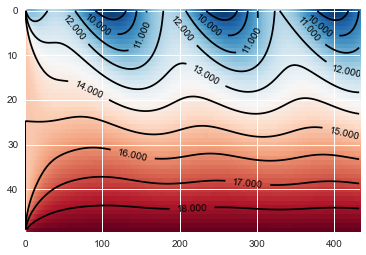

In [20]:
ax = plt.imshow(T.T,cmap='RdBu_r',aspect='auto',interpolation='nearest') # création de la carte des températures

# Cration des contours
CS = plt.contour(Y,X,T,10,
                 colors='k',linewidth=1)   # negative contours will be dashed by default
                 
plt.clabel(CS, fontsize=10, inline=0.5)    # tracer des labels

f = ax.get_figure()                        # récupération de l'objet figure qui "encapsule" l'objet ax

f.savefig('Chronogram_Temperature_1D.png',dpi=150) # Sauvegarde du graphe

### Sauvegarder vos résultats : 

Sauvez la matrice T au format csv avec la fonction savetxt de numpy

In [21]:
np.savetxt('temperature_1D_implicit.csv',T,delimiter=';')

## Bonus : Calcul symbolique avec Sympy

In [22]:
from sympy import *
init_printing() # formatte les sorties avec Latex

In [39]:
X = Symbol('X')
x, y, z, t, i = symbols('x y z t i')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)

In [24]:
expand((X+1)*(X+2))

In [25]:
factor(x**2+3*x+2)

In [26]:
(1/cos(x)).series(x, 0, 10) # développement en série limitée autour de 0 à l'ordre 10

In [27]:
summation(1/2**i, (i, 0, oo)) # somme infinie de 1/2^n 

In [33]:
integrate(exp(-y**2)*erf(y), y) # intégration

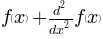

In [43]:
f = Function('f')
f(x).diff(x, x) + f(x)

In [44]:
dsolve(f(x).diff(x, x) + f(x), f(x))   # résolution d'équations différentielles

In [31]:
solve([x + 5*y - 2, -3*x + 6*y - 15], [x, y]) # résolution d'équation linéaire

C:\Anaconda\lib\site-packages\IPython\core\formatters.py:239: FormatterWarning: Exception in image/png formatter: 
\begin{Bmatrix}x : -3, & y : 1\end{Bmatrix}
^
Unknown symbol: \begin (at char 0), (line:1, col:1)
  FormatterWarning,


{x: -3, y: 1}

In [32]:
import IPython
import sympy
from statsmodels import version as sm_version
print "Sympy version   \t:\t %s"%sympy.__version__
print "IPython version \t:\t %s"%IPython.__version__
print "numpy version   \t:\t %s"%np.__version__
print "statsmodels version \t:\t %s"%sm_version.full_version
print "matplotlib version \t:\t %s"%plt.__version__

Sympy version   	:	 0.7.5
IPython version 	:	 2.4.1
numpy version   	:	 1.9.2
statsmodels version 	:	 0.5.0
matplotlib version 	:	 1.9.2
